In [2]:
import pymongo
import datetime
import collections

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats
from collections import Counter
from sklearn import cluster

In [3]:
immigration_referendum_df = pd.read_csv("data/anotated_immigration_net_referendum_df.csv",index_col="Unnamed: 0")
immigration_cluster0 = immigration_referendum_df[immigration_referendum_df["Cluster"] == 0]
immigration_cluster1 = immigration_referendum_df[immigration_referendum_df["Cluster"] == 1]

# Analysis of districts over 20,000 net immigration figures

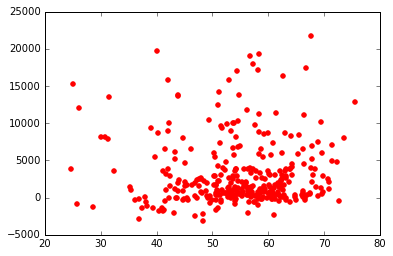

In [4]:
plt.scatter(immigration_cluster0['Pct_Leave'],
            immigration_cluster0['international_net_total'],
            color='red', marker='o', label='')

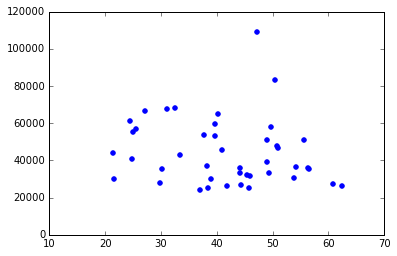

In [5]:
plt.scatter(immigration_cluster1['Pct_Leave'],
            immigration_cluster1['international_net_total'],
            color='blue', marker='o', label='')

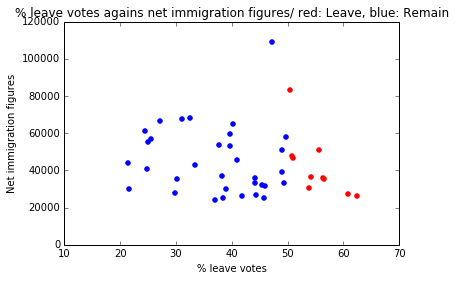

In [6]:
plt.scatter(immigration_cluster1[immigration_cluster1["Pct_Leave"] < 50]["Pct_Leave"],
            immigration_cluster1[immigration_cluster1["Pct_Leave"] < 50]["international_net_total"],
           color="blue")

plt.scatter(immigration_cluster1[immigration_cluster1["Pct_Leave"] > 50]["Pct_Leave"],
            immigration_cluster1[immigration_cluster1["Pct_Leave"] > 50]["international_net_total"],
           color="red")

plt.xlabel("% leave votes")
plt.ylabel("Net immigration figures")
plt.title("% leave votes agains net immigration figures/ red: Leave, blue: Remain")

In [7]:
print("The number of districts with over 20,000 net immigrants that voted remain is",
      len(immigration_cluster1[immigration_cluster1["Pct_Leave"] >50]))

print("The number of districts with over 20,000 net immigrants that voted leave is",
      len(immigration_cluster1[immigration_cluster1["Pct_Leave"] <50]))



The number of districts with over 20,000 net immigrants that voted remain is 10
The number of districts with over 20,000 net immigrants that voted leave is 33


The above analysis states than in districts with over 20,000 net immigrants, only 23% voted leave.

In [8]:
immigration_cluster1["country"].value_counts()

E    39
S     3
N     1
Name: country, dtype: int64

Out of the 43 districts with more than 20,000 net immigration figure, 39 belonged to England, 3 to Scotland, and the other one is Northern Ireland on its entirety. Because Northern Ireland is not divided by districts, but it is represented as a whole country we cannot include it here (despite voting for the remain option).

Let's have a look at what areas are those ones with over 20,000 net immigarion.

In [9]:
immigration_cluster1["Region"].value_counts()

London                      24
Yorkshire and The Humber     3
Scotland                     3
East Midlands                2
South East                   2
North West                   2
East                         2
West Midlands                2
South West                   1
Northern Ireland             1
North East                   1
Name: Region, dtype: int64

In [10]:
immigration_referendum_df["Region"].value_counts()

South East                  67
East                        47
East Midlands               40
North West                  39
South West                  37
London                      33
Scotland                    32
West Midlands               30
Wales                       22
Yorkshire and The Humber    21
North East                  12
Northern Ireland             1
Name: Region, dtype: int64

# A closer look to England's districts with over 20,000 immigration figures

In [11]:
england_df = immigration_referendum_df.groupby("country").get_group("E")
scotland_df = immigration_referendum_df.groupby("country").get_group("S")

In [12]:
england_df = england_df.copy()
england_df.sort_values(by="Pct_Leave", inplace=True)

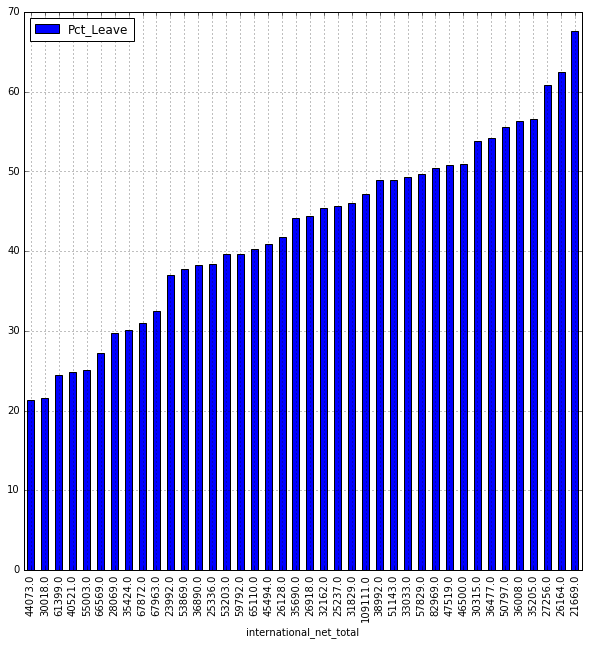

In [13]:
plt.figure()
england_df[england_df["international_net_total"] >20000].plot.bar(x="international_net_total", y="Pct_Leave", figsize=(10,10),
                                                                 grid=True)


# Pearson's *R*² on England dataframe

In [14]:
scipy.stats.pearsonr(england_df['international_net_total'],
            england_df['Pct_Leave'])

(-0.43796757931073099, 1.0378680364494461e-16)

The Pearsons test indicates that indeed the percentage of people voting leave descends as the net immigration figures rise. 

In [15]:
england_df[england_df["Cluster"] == 1]["Pct_Turnout"].mean()

67.781282051282048

In [16]:
england_df[england_df["Cluster"] == 0]["Pct_Turnout"].mean()

75.280383275261329

In [17]:
immigration_referendum_df["Pct_Turnout"].mean()

73.728818897637794

In [18]:
england_df[england_df["Cluster"] == 0]["Pct_Leave"].mean()

56.181602787456448

In [19]:
england_df[england_df["Cluster"] == 1]["Pct_Leave"].mean()

42.136923076923075

In [20]:
immigration_cluster1[["Pct_Turnout", "Pct_Leave", ]].describe()

,Pct_Turnout,Pct_Leave
count,43.000000,43.000000
mean,67.518837,41.521628
std,4.304137,10.991644
min,56.250000,21.380000
25%,65.065000,32.975000
50%,67.630000,41.810000
75%,70.235000,49.495000
max,78.400000,62.440000


In [21]:
immigration_cluster0[["Pct_Turnout", "Pct_Leave", ]].describe()

,Pct_Turnout,Pct_Leave
count,338.000000,338.000000
mean,74.518846,54.592544
std,4.610101,9.372491
min,60.910000,24.710000
25%,71.562500,49.970000
50%,75.045000,55.285000
75%,78.237500,60.957500
max,83.570000,75.560000


In [22]:
immigration_referendum_df

,Area_Code,Area_x,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,Cluster
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,32071,34,0,12,6,16,30.43,69.57,0.07,0
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,40177,35,0,16,1,18,34.52,65.48,0.06,0
2,E06000003,Redcar and Cleveland,E,139159,1336,1523,-187,3951,4259,-308,...,48128,27,0,6,0,21,33.81,66.19,0.04,0
3,E06000004,Stockton-on-Tees,E,183795,1938,1719,219,6269,5531,738,...,61982,45,2,13,2,28,38.27,61.73,0.04,0
4,E06000005,Darlington,E,97894,1102,1173,-71,3815,3521,294,...,30994,29,0,0,0,29,43.82,56.18,0.05,0
5,E06000006,Halton,E,118559,1389,1230,159,3253,3678,-425,...,37327,42,0,7,1,34,42.58,57.42,0.06,0
6,E06000007,Warrington,E,191202,2149,1836,313,6517,6412,105,...,62487,61,0,17,1,43,45.73,54.27,0.05,0
7,E06000008,Blackburn with Darwen,E,138453,2126,1383,743,4792,5665,-873,...,36799,87,0,40,4,43,43.66,56.34,0.13,0
8,E06000009,Blackpool,E,142270,1417,2135,-718,9023,8333,690,...,45146,32,0,8,3,21,32.54,67.46,0.05,0
9,E06000010,"Kingston upon Hull, City of",E,249913,2814,2584,230,9009,10690,-1681,...,76646,81,0,23,4,54,32.38,67.62,0.07,0
